High-Spatial-Resolution Multi-Omics Sequencing via Deterministic Barcoding in Tissue

ShortName: liu2020high

Steps of processing the data from raw to Anndata:

In [1]:
# 1, Download the raw data from https://lincs.hms.harvard.edu/lin-elife-2018/

In [2]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad

In [1]:
path = '/home/yzy/PUBDT/st/DBiTseq/data_raw'


In [ ]:
# the data format is similar with ST,

In [ ]:
# we process one data as an example

In [3]:
sample = 'GSM4096262_0725cL.tsv'

In [6]:
raw_pd = pd.read_csv(f'{path}/{sample}',delimiter='\t')

In [8]:
raw_pd = raw_pd.set_index('Unnamed: 0')

In [9]:
raw_pd

,Gm37180,Gm37363,Gm37686,Gm37329,Gm38148,Xkr4,Rp1,Sox17,Gm6085,Gm6119,...,mt-Co3,mt-Nd3,mt-Nd4l,mt-Nd4,mt-Nd5,mt-Nd6,mt-Te,mt-Cytb,mt-Tt,mt-Tp
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
41x14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,80.0,2.0,1.0,14.0,13.0,0.0,0.0,34.0,0.0,0.0
41x15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,1.0,2.0,17.0,6.0,0.0,0.0,28.0,0.0,0.0
41x16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.0,0.0,0.0,7.0,4.0,0.0,0.0,16.0,0.0,0.0
41x17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,114.0,2.0,1.0,30.0,5.0,0.0,0.0,75.0,0.0,0.0
41x18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,98.0,0.0,0.0,14.0,4.0,0.0,0.0,44.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42x30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.0,1.0,3.0,40.0,6.0,0.0,0.0,60.0,0.0,0.0
42x31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.0,0.0,4.0,18.0,11.0,0.0,0.0,37.0,0.0,0.0
42x32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,131.0,0.0,3.0,34.0,19.0,0.0,0.0,50.0,0.0,0.0


In [14]:
gene_list = list(raw_pd.columns)
spot_list = list(raw_pd.index)

spatial_mat = [xy.split('x') for xy in spot_list]
spatial_mat = np.array(spatial_mat).astype('int')

In [16]:
X = np.array(raw_pd.values).astype('int')

In [17]:
adata = ad.AnnData(X=X)
adata.var_names = gene_list
adata.obs_names = spot_list
adata.obsm['spatial'] = spatial_mat

/tmp/ipykernel_1068552/923804457.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=X)


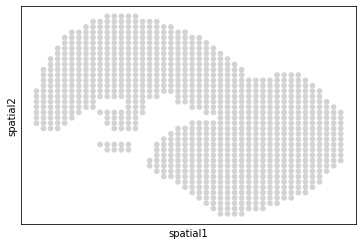

In [18]:
sc.pl.embedding(adata,basis='spatial')

In [ ]:
adata.write_h5ad(...)